# Segmentace obrazu - počítání objektů
Cvičení je zaměřené na správné využití osvětlení při nasvícení objektu a následné využití metod pro segmentaci obrazu k počítání objektů. Je třeba se **zbavit odlesků**, **vyvážit bílou barvu** snímače, **vyladit jas** pomocí histogramu, atd...

<img src='images/lentilky_promo.jpg' style="width:50%">
<p style="text-align: center;">Ilustrační obrázek špatně nasnímaného objektu. :-)</p>

### Import knihoven a konfigurace

In [1]:
%run ./library.ipynb

### Pomocné funkce
Z následujících funkcí je potřeba vybírat ty vhodné pro splnění úkolu. Parametry a implementaci funkcí si můžete zobrazit pomocí příkazu `help(function_name)` nebo na https://gitlab.fit.cvut.cz/bi-svz/improutils_package/tree/master/improutils.

Seznam funkcí pro přehlednost:
- [`plot_images(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/visualisation/visualisation.py#L11)
- [`load_image(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/acquisition/img_io.py#L11)


- [`to_gray(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L4)
- [`to_hsv(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L21)
- [`negative(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L53)
- [`crop(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L99)


- [`segmentation_one_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L56)
- [`segmentation_auto_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L74)
- [`segmentation_two_thresholds(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L90)
- [`find_contours(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/contours.py#L40)


- [`filtration_median(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/filtration/filtration.py#L22)


- [`to_intensity(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L15)

---

### Úkol
Zvolte vhodné funkce pro segmentaci obrazu a spočítejte kolik se na obrázku vyskytuje celkem objektů. Využijte k tomu znalosti o segmentaci objektů podle barvy (*HINT: jiné barevné spektrum než RGB*) a postupně spočtěte objekty stejných barev, které nakonec sečtete dohromady.

Na obrázku je vidět převod barvy na úhel v jiném než RGB spektru.
<img src='images/color_wheel_hsv.png' style="width:25%">

Po vyladění algoritmu na jednotlivé úlohy, demonstrujte algoritmus na pořízeném snímku.

#### 1) Načtěte a zkontrolujte zaznamenaný obrázek.

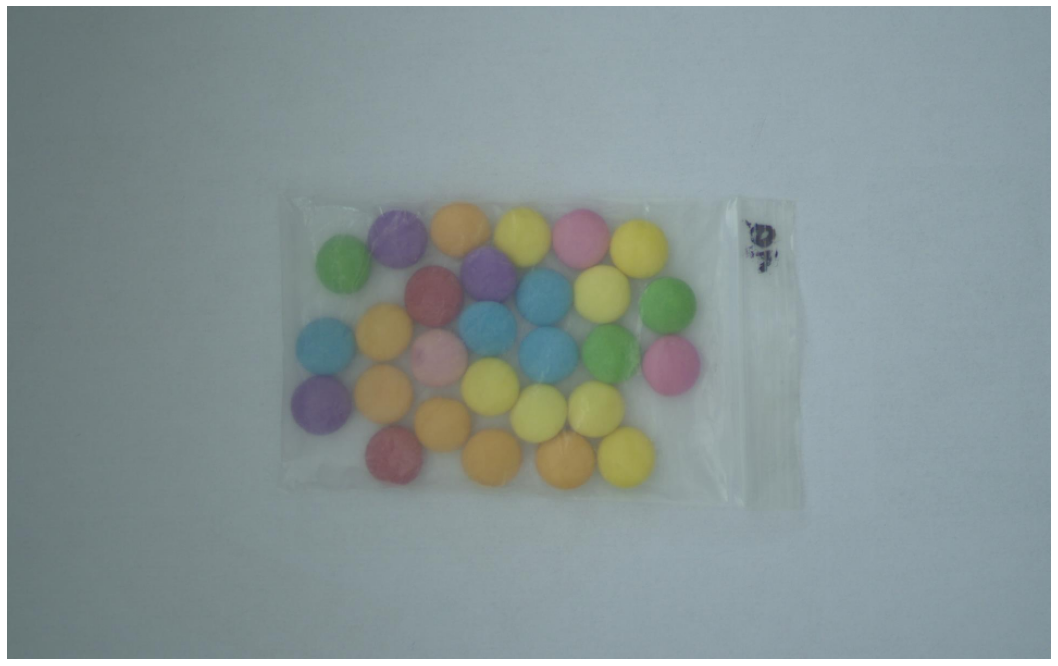

In [9]:
image_path = "data/1.jpg" ###
# defaultní barevný prostor OpenCV/Improutils je BGR
image_bgr = load_image(image_path) ###
# snížení velikosti obrázku pro rychlejší výpočet v interact slideru
image_bgr = cv2.resize(image_bgr, dsize = None, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
# image_bgr = crop(image_bgr, 300, 300, 1600, 900)
plot_images(image_bgr)

#### 2) Testovací/Pomocná funkce.
Zde si můžete interaktivně otestovat váš algoritmus.

Poznámka 1: snažte se zakomponovat nějaký jednoduchý preprocessing, který vám následně usnadní segmentaci.

Poznámka 2: u některých barev se vám bude zdát, že segmentace nefunguje, zamyslete se proč tomu tak je.

In [11]:

def find_thresholds(h_range, s_range, v_range):
    """ Funkce je vstupem pro funkci multicolor_segmentation, neměňte její syntaxi """
    
    lower_bound=(to_intensity(h_range[0]), s_range[0], v_range[0]) ###
    upper_bound=(to_intensity(h_range[1]), s_range[1], v_range[1]) ###
    
    ### Převod do některého z barevných prostorů
    
    image = to_hsv(image_bgr) ###
    
    ### Preprocessing, filtrace atd.
    
    pass
    
    ### Segmentace podle barvy
    mask = segmentation_two_thresholds(image,lower_bound,upper_bound) ###
    
    plot_images(mask, apply_mask(image_bgr, mask), titles=['Applied mask', 'Mask'])

colors = ['green', 'blue', 'purple', 'yellow', 'orange', 'pink', 'red']
color_thresholds = multicolor_segmentation(find_thresholds,colors)

In [12]:
# Vypsání uložených prahů
if color_thresholds:
    for color,threshold in color_thresholds.items():
        print(f'Color: {color}, Threshold: {color_thresholds[color]}')
else:
    print('No color thresholds saved/chosen yet.')

Color: green, Threshold: ((104, 170), (35, 255), (0, 255))


#### 3) Doplňte algoritmus pro segmentaci objektů podle vybrané barvy. 
Vytvořte si konkrétní prahy, které budou vhodné pro danou barvu.

In [36]:
print(color_thresholds["green"])
print(type(color_thresholds["green"]))

((104, 170), (35, 255), (0, 255))
<class 'tuple'>


In [41]:
def get_mask_for(img, color):
    if color=='green':
        lower = [i for i, u in color_thresholds["green"]]
        tmp = color_thresholds["green"]

        lower = (to_intensity(tmp[0][0]), tmp[1][0], tmp[2][0])
        upper = (to_intensity(tmp[0][1]), tmp[1][1], tmp[2][1])
#         upper = [u for i, u in color_thresholds["green"]]
        mask = segmentation_two_thresholds(img, lower, upper) ### ###
    elif color=='blue':
        ... ###
    elif color=='purple':
        ... ###
    elif color=='yellow':
        ... ###
    elif color=='orange':
        ... ###
    elif color=='pink':
        ... ###
    elif color=='red':
        ... ###
    else:
        raise ValueError("Invalid color selected.")

    ###
    return mask

In [42]:
def algorithm(img, color):
    
    ### Převod do některého z barevných prostorů
    
    img_hsv = to_hsv(img)
    
    ### Preprocessing, filtrace atd.
    
    ...
    
    ### Segmentace podle barvy
    mask_bin = get_mask_for(img_hsv, color)
    
    ###

    res = apply_mask(img, mask_bin)
    
    return res, mask_bin

#### 4) Doplňte funkci, která spočte objekty z binární masky.

In [45]:
def count_objects(mask):
    min_area, max_area = 300, 10000 ###
    _, count, _ = find_contours(mask, min_area, max_area) ###
    return count

#### 5) Spusťte výsledný algoritmus pro spočtení objektů libovolné vybrané barvy v obraze. 

In total 3 green objects found.


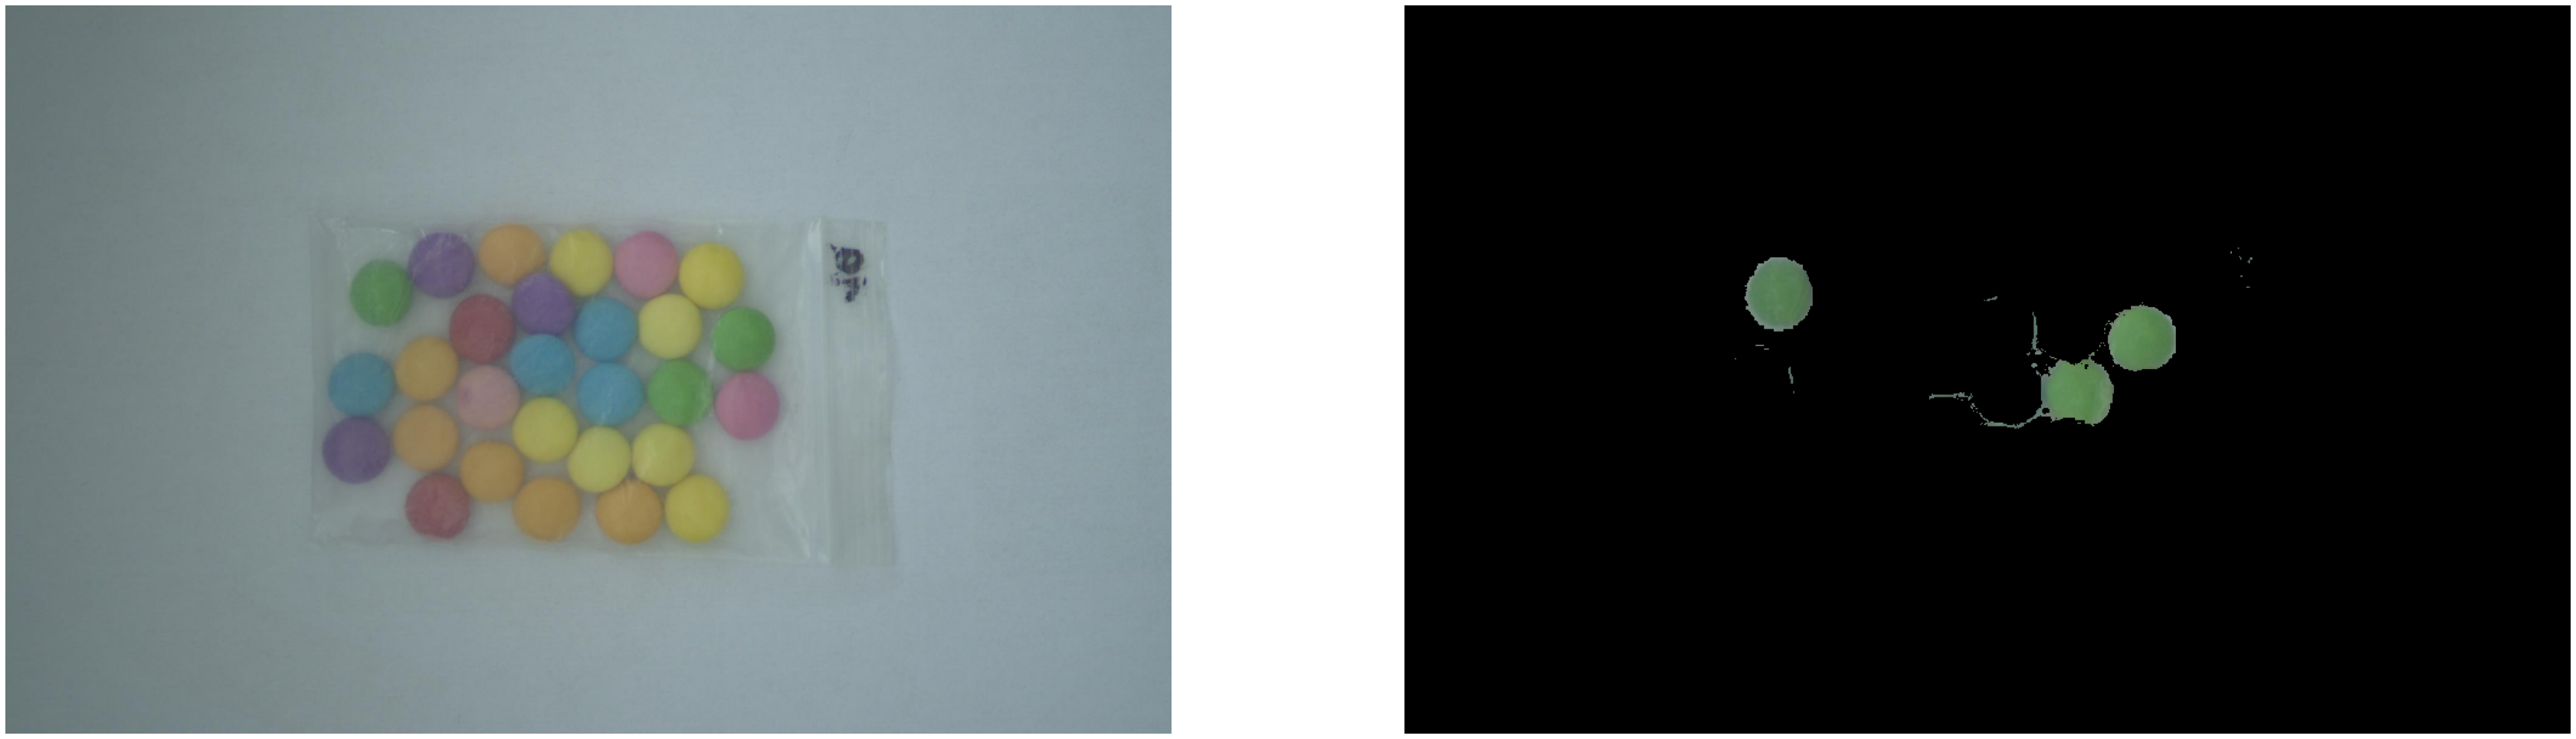

In [46]:
selected_color = "green" ###


result, mask = algorithm(image_bgr, selected_color)
count = count_objects(mask)

print(f'In total {count} {selected_color} objects found.')
plot_images(image_bgr, result)   